In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [6]:
def getFromFile(file,info):
    cap = cv2.VideoCapture(file)
    ret, frame = cap.read()
    cap.release()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if(info):
        print(f'The shape of the image is {frame_rgb.shape}')
    return frame_rgb

In [5]:
def getLimits(b,g,r,rangeWidth):
    arr = [[[b,g,r]]]
    color = np.uint8(arr)
    hsvColor = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
    lowerLimit = [hsvColor[0][0][0]-rangeWidth,40,40]
    upperLimit = [hsvColor[0][0][0]+rangeWidth,255,255]
    return [lowerLimit,upperLimit]

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def frame_diff(prev_frame, cap):
    ret, next_frame = cap.read()
    next_frame = cv2.flip(next_frame,0)
    diff = cv2.absdiff(prev_frame, next_frame)
    diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    diff = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)
    return diff

def frameCenter(frame, area):
    # Find contours in the bw frame
#     lims=getLimits(255,255,255,10)
#     print(lims)
#     lowerLimit = lims[0]
#     upperLimit = lims[1]
    lowerLimit=[0,0,30]
    upperLimit = [0,0,100]
    hsv_image =  cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    hsv_image =  cv2.cvtColor(hsv_image, cv2.COLOR_RGB2HSV)
    
    blue_regions = cv2.inRange(hsv_image, np.array(lowerLimit), np.array(upperLimit))
    
    contours, _ = cv2.findContours(blue_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     contours, _ = cv2.findContours(frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > area: # Minimum contour area threshold
            M = cv2.moments(contour)
            if M["m00"] != 0:
                center_x = M["m10"] / M["m00"]
                center_y = M["m01"] / M["m00"]
                print(f"Centroid of dot: (x, y) = ({center_x:.1f}, {center_y:.1f})")
                return (center_x, center_y)
    return (-1, -1)


def ballIsMiddle(center_y, frame_height, treshold=3):
    if center_y < frame_height/2 + treshold and center_y > frame_height/2 - treshold:
        return True
    else:
        return False




def main():
    #open stream from camera
    cap = cv2.VideoCapture(1)
    #block camera from changing auto exposure
    cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, 0.25)
    #cap.set(cv2.CAP_PROP_EXPOSURE, 0.1)
    #block camera from changing auto white balance
    cap.set(cv2.CAP_PROP_AUTO_WB, 0.25)
    cap.set(cv2.CAP_PROP_WB_TEMPERATURE, 0.01)

    #create window
    cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
    
    #get frame sizes
    frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    #when q is pressed, quit
    while True:
        ret, frame = cap.read()
        #compute the absolute difference between the current frame and the next frame
        result = frame_diff(frame, cap)
        #find centroid of ball
        center_x,center_y = frameCenter(result, 100)
        #make result rgb so we can add a green circle
        result = cv2.cvtColor(result, cv2.COLOR_GRAY2RGB)
        #add centroid to frame as a green circle
        cv2.circle(result, (int(center_x), int(center_y)), 10, (0, 255, 0), 1)

        #if ball is in the middle draw a line across the orizontal center of the frame
        if ballIsMiddle(center_y, frame_height):
            cv2.line(result, (0, 240), (640, 240), (255, 0, 0), 2)


        #show the result
        cv2.imshow('frame', result)
        if cv2.waitKey(1) & 0xFF == ord('q'): # press q to quit
            cap.release()
            cv2.destroyAllWindows()
            break

    return



In [ ]:
main()

Centroid of dot: (x, y) = (491.0, 239.4)
Centroid of dot: (x, y) = (354.8, 300.7)
Centroid of dot: (x, y) = (355.6, 360.5)
Centroid of dot: (x, y) = (415.5, 429.7)
Centroid of dot: (x, y) = (415.8, 440.2)
Centroid of dot: (x, y) = (416.3, 455.3)
Centroid of dot: (x, y) = (497.4, 348.8)
Centroid of dot: (x, y) = (498.9, 356.9)
Centroid of dot: (x, y) = (448.3, 239.3)
Centroid of dot: (x, y) = (372.2, 227.3)
Centroid of dot: (x, y) = (445.7, 251.5)
Centroid of dot: (x, y) = (373.8, 240.4)
Centroid of dot: (x, y) = (375.9, 217.0)
Centroid of dot: (x, y) = (377.8, 207.6)
Centroid of dot: (x, y) = (482.3, 344.7)
Centroid of dot: (x, y) = (499.3, 352.7)
Centroid of dot: (x, y) = (493.6, 285.5)
Centroid of dot: (x, y) = (445.7, 235.2)
Centroid of dot: (x, y) = (383.0, 211.8)
Centroid of dot: (x, y) = (367.5, 221.2)
Centroid of dot: (x, y) = (377.9, 230.8)
Centroid of dot: (x, y) = (377.1, 222.4)
Centroid of dot: (x, y) = (544.6, 442.9)
Centroid of dot: (x, y) = (626.3, 465.1)
Centroid of dot:

Centroid of dot: (x, y) = (492.6, 458.2)
Centroid of dot: (x, y) = (257.4, 464.5)
Centroid of dot: (x, y) = (146.4, 461.0)
Centroid of dot: (x, y) = (37.0, 467.7)
Centroid of dot: (x, y) = (48.5, 473.0)
Centroid of dot: (x, y) = (161.3, 476.0)
Centroid of dot: (x, y) = (8.5, 405.1)
Centroid of dot: (x, y) = (57.2, 416.2)
Centroid of dot: (x, y) = (287.6, 454.5)
Centroid of dot: (x, y) = (40.3, 415.4)
Centroid of dot: (x, y) = (272.3, 461.9)
Centroid of dot: (x, y) = (243.6, 465.6)
Centroid of dot: (x, y) = (444.2, 445.8)
Centroid of dot: (x, y) = (276.3, 474.3)
Centroid of dot: (x, y) = (293.6, 456.7)
Centroid of dot: (x, y) = (383.8, 224.5)
Centroid of dot: (x, y) = (69.5, 289.3)
Centroid of dot: (x, y) = (12.8, 149.2)
Centroid of dot: (x, y) = (149.3, 26.4)
Centroid of dot: (x, y) = (388.1, 187.1)
Centroid of dot: (x, y) = (401.1, 288.9)
Centroid of dot: (x, y) = (607.9, 15.1)
Centroid of dot: (x, y) = (557.7, 446.9)
Centroid of dot: (x, y) = (268.3, 465.9)
Centroid of dot: (x, y) = 

Centroid of dot: (x, y) = (368.6, 351.1)
Centroid of dot: (x, y) = (543.3, 313.9)
Centroid of dot: (x, y) = (470.1, 246.6)
Centroid of dot: (x, y) = (451.5, 262.4)
Centroid of dot: (x, y) = (445.9, 274.8)
Centroid of dot: (x, y) = (507.3, 299.7)
Centroid of dot: (x, y) = (254.0, 211.2)
Centroid of dot: (x, y) = (390.2, 18.8)
Centroid of dot: (x, y) = (377.3, 207.5)
Centroid of dot: (x, y) = (327.1, 7.1)
Centroid of dot: (x, y) = (4.7, 213.9)
Centroid of dot: (x, y) = (75.7, 472.6)
Centroid of dot: (x, y) = (70.5, 472.8)
Centroid of dot: (x, y) = (125.0, 469.3)
Centroid of dot: (x, y) = (383.7, 467.8)
Centroid of dot: (x, y) = (633.9, 472.2)
Centroid of dot: (x, y) = (426.6, 469.8)
Centroid of dot: (x, y) = (301.1, 368.2)
Centroid of dot: (x, y) = (434.7, 456.2)
Centroid of dot: (x, y) = (205.4, 448.7)
Centroid of dot: (x, y) = (35.1, 412.2)
Centroid of dot: (x, y) = (624.7, 454.8)
Centroid of dot: (x, y) = (368.9, 447.6)
Centroid of dot: (x, y) = (142.5, 453.3)
Centroid of dot: (x, y) 

## NOTE
--Per un immagine in scala di grigi i singoli elementi dell'array sono le righe di pixel del singolo frame
--Qui si prova a individuare una fascia centrale per cui sommare tutti i valori della fasica, che dovrebbero registrare un cambiamento al passaggio della pallina

frame:0,count: 213616
frame:1,count: 382035
frame:2,count: 266677
frame:3,count: 190941
frame:4,count: 97056
frame:5,count: 445808
frame:6,count: 171049
frame:7,count: 265731
frame:8,count: 441922
frame:9,count: 266092
frame:10,count: 452969
frame:11,count: 461305
frame:12,count: 310988
frame:13,count: 197531
frame:14,count: 335809
frame:15,count: 522849
frame:16,count: 427502
frame:17,count: 348406
frame:18,count: 557076
frame:19,count: 235484
frame:20,count: 385650
frame:21,count: 323273
frame:22,count: 170506
frame:23,count: 348088
frame:24,count: 187638
frame:25,count: 379018
frame:26,count: 248165
frame:27,count: 229643
frame:28,count: 242367
frame:29,count: 316064
frame:30,count: 445322
frame:31,count: 435179
frame:32,count: 487549
frame:33,count: 476603
frame:34,count: 221706
frame:35,count: 433635
frame:36,count: 706601
frame:37,count: 439890
frame:38,count: 696758
frame:39,count: 290906
frame:40,count: 618297
frame:41,count: 283653
frame:42,count: 374873
frame:43,count: 489768

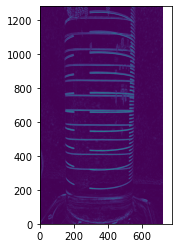

In [26]:
cap = cv2.VideoCapture("palla grande.mp4")
# corners = [[200, 0], [200, 1280], [500, 1280], [500, 0]]
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = cap.get(cv2.CAP_PROP_FPS)
    
# outfilename = "blackwhite.mp4"   

# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter(outfilename, fourcc, fps, (frame_width, frame_height))

plt.axis([0,780,0,1280])
max = 0
max_index = 0
img = []
for frame_index in range(math.floor(n_frames/2)):
    ret, frame = cap.read()
    frame = cv2.flip(frame,0)
    result = frame_diff(frame, cap)
    tot = 0
    for i in range(600,680):
        tot+=sum(result[i])
    if(tot>max):
        max=tot
        max_index = frame_index
        img = result
    print(f"frame:{frame_index},count: {tot}")
#     out.write(result)
# out.release()
print(f"max:{max}, max_index:{max_index}")
plt.imshow(img)
cap.release()

In [16]:
def getFrame(file,num):
    cap = cv2.VideoCapture(file)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f'The video contains {n_frames} frames')
    if(num>=n_frames):
        print("FRAME OUT OF INDEX")
        return -1
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, num)
        ret, frame = cap.read()
        cap.release()
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        return frame_rgb

The video contains 192 frames


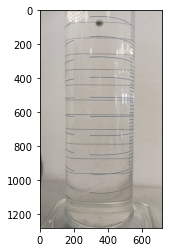

In [20]:
plt.imshow(getFrame("palla grande.mp4",120))

In [4]:
import math